# Loading, testing, and exploring the 'Sentiment' dataset

 #### Installing, importing, and defining required packages

In [1]:
!pip install transformers
!pip install torch
!pip install pandas
!pip install numpy
!pip install tabulate
!pip install emoji
import csv
import matplotlib.pyplot as mpl
import requests
import urllib
import pandas as pd
import numpy as np
from pathlib import Path
from urllib.request import urlopen
import nltk
nltk.download('punkt')

# Import Sentiment dataset

In [2]:
MAPPING_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/sentiment/mapping.txt"
mapping = urlopen(MAPPING_URL).read().decode('utf-8').split("\n")


TEST_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/sentiment/test_labels.txt"
test_labels = urlopen(TEST_LABELS_URL).read().decode('utf-8').split("\n")


TEST_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/sentiment/test_text.txt"
test_text = urlopen(TEST_TEXT_URL).read().decode('utf-8').split("\n")


TRAIN_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/sentiment/train_labels.txt"
train_labels = urlopen(TRAIN_LABELS_URL).read().decode('utf-8').split("\n")


TRAIN_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/sentiment/train_text.txt"
train_text = urlopen(TRAIN_TEXT_URL).read().decode('utf-8').split("\n")


VAL_LABELS_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/sentiment/val_labels.txt"
val_labels = urlopen(VAL_LABELS_URL).read().decode('utf-8').split("\n")


VAL_TEXT_URL = "https://raw.githubusercontent.com/GDarkens/CE888/main/Assignments/Assignment1/tweeteval/datasets/sentiment/val_text.txt"
val_text = urlopen(VAL_TEXT_URL).read().decode('utf-8').split("\n")




 #### Basic info about imported data structures (all values should be in thousands, apart from mapping.txt)

In [3]:
print("Mapping information:")
print("mapping.txt length: " + str(len(mapping)) + "\n")

print("Test data information:")
print("test_labels.txt length: " + str(len(test_labels)))
print("test_text.txt length: " + str(len(test_text)) + "\n")

print("Training data information:")
print("train_labels.txt length: " + str(len(train_labels)))
print("train_text.txt length: " + str(len(train_text)) + "\n")
      
print("Value data information:")
print("val_labels.txt length: " + str(len(val_labels)))
print("val_text.txt length: " + str(len(val_text)))


Mapping information:
mapping.txt length: 4

Test data information:
test_labels.txt length: 12285
test_text.txt length: 12285

Training data information:
train_labels.txt length: 45616
train_text.txt length: 45616

Value data information:
val_labels.txt length: 2001
val_text.txt length: 2001


In [4]:
def visualiser(tweetVar, labelVar):
    tweet_array = []
    label_array = []
    for i in range(len(tweetVar)):
        tweet_array.append({"Tweet" : tweetVar[i], "Label" : labelVar[i]})
        label_array.append(i)
    dataframe = pd.DataFrame(tweet_array, index=label_array)
    dataframe = dataframe[:-1] # Drop last row, as is a blank
    return dataframe

testDataFrame = visualiser(test_text, test_labels)
trainDataFrame = visualiser(train_text, train_labels)
valDataFrame = visualiser(val_text, val_labels)

print("\n test_data and test_label: ")
display(testDataFrame)
print("\n---------------------------------------------------------------------------\n")
print("\n train_data and train_label: ")
display(trainDataFrame)
print("\n---------------------------------------------------------------------------\n")
print("\n val_data and val_label: ")
display(valDataFrame)

print("\n---------------------------------------------------------------------------\n")
print("\n mapping output: ")
for line in mapping:
    print(line)


 test_data and test_label: 


,Tweet,Label
0,@user @user what do these '1/2 naked pics' hav...,1
1,OH: “I had a blue penis while I was this” [pla...,1
2,"@user @user That's coming, but I think the vic...",1
3,I think I may be finally in with the in crowd ...,2
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",0
...,...,...
12279,Sentinel Editorial: FBI’s Comey ‘had no one of...,1
12280,perfect pussy clips #vanessa hudgens zac efron...,1
12281,#latestnews 4 #newmexico #politics + #nativeam...,1
12282,Trying to have a conversation with my dad abou...,0



---------------------------------------------------------------------------


 train_data and train_label: 


,Tweet,Label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2
...,...,...
45610,"@user \""""So amazing to have the beautiful Lady...",2
45611,"9 September has arrived, which means Apple's n...",2
45612,Leeds 1-1 Sheff Wed. Giuseppe Bellusci securin...,2
45613,@user no I'm in hilton head till the 8th lol g...,1



---------------------------------------------------------------------------


 val_data and val_label: 


,Tweet,Label
0,Dark Souls 3 April Launch Date Confirmed With ...,1
1,"""National hot dog day, national tequila day, t...",2
2,When girls become bandwagon fans of the Packer...,0
3,@user I may or may not have searched it up on ...,1
4,Here's your starting TUESDAY MORNING Line up a...,1
...,...,...
1995,"""LONDON (AP) """" Prince George celebrates his s...",1
1996,Harper's Worst Offense against Refugees may be...,1
1997,Hold on... Sam Smith may do the theme to Spect...,2
1998,Gonna watch Final Destination 5 tonight. I alw...,1



---------------------------------------------------------------------------


 mapping output: 
0	negative
1	neutral
2	positive



#### Printing basic stats

In [5]:
print("The longest tweet in testData is " + str(testDataFrame.Tweet.str.len().max()) + " bytes long.")
print("The longest tweet in trainData is " + str(trainDataFrame.Tweet.str.len().max()) + " bytes long.")
print("The longest tweet in valData is " + str(valDataFrame.Tweet.str.len().max()) + " bytes long.")
print("\n---------------------------------------------------------------------------\n")

print("The shortest tweet in testData is " + str(testDataFrame.Tweet.str.len().min()) + " bytes long.")
print("The shortest tweet in trainData is " + str(trainDataFrame.Tweet.str.len().min()) + " bytes long.")
print("The shortest tweet in valData is " + str(valDataFrame.Tweet.str.len().min()) + " bytes long.")
print("\n")


The longest tweet in testData is 142 bytes long.
The longest tweet in trainData is 201 bytes long.
The longest tweet in valData is 171 bytes long.

---------------------------------------------------------------------------

The shortest tweet in testData is 7 bytes long.
The shortest tweet in trainData is 11 bytes long.
The shortest tweet in valData is 29 bytes long.




 ### Presenting data label split (negative vs positive vs neutral)

In [6]:
categoryNames = ["negative", "neutral", "positive"]


def mappingVariation(dataFrame):
    CountArray = []
    sentiment = dataFrame.Label.value_counts().sort_index()
    
    i = 0
    for val in sentiment:
        CountArray.append(val)
        i += 1
    return sentiment



<function matplotlib.pyplot.show(close=None, block=None)>

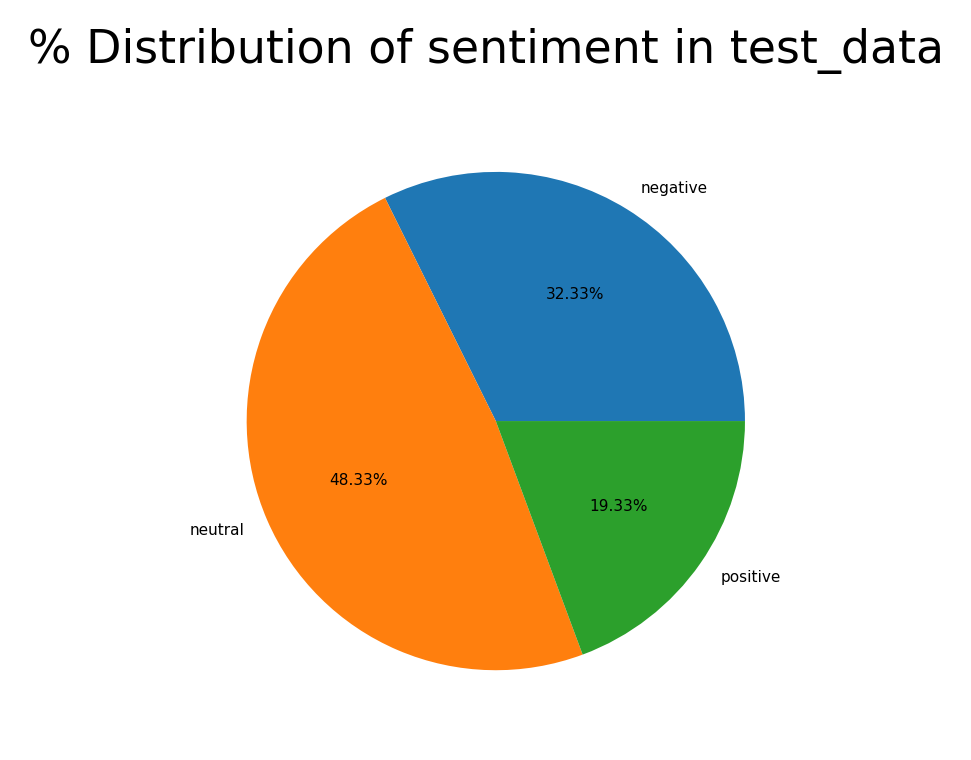

In [7]:
testDataFrameCount = mappingVariation(testDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(testDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('% Distribution of sentiment in test_data')
mpl.show

<function matplotlib.pyplot.show(close=None, block=None)>

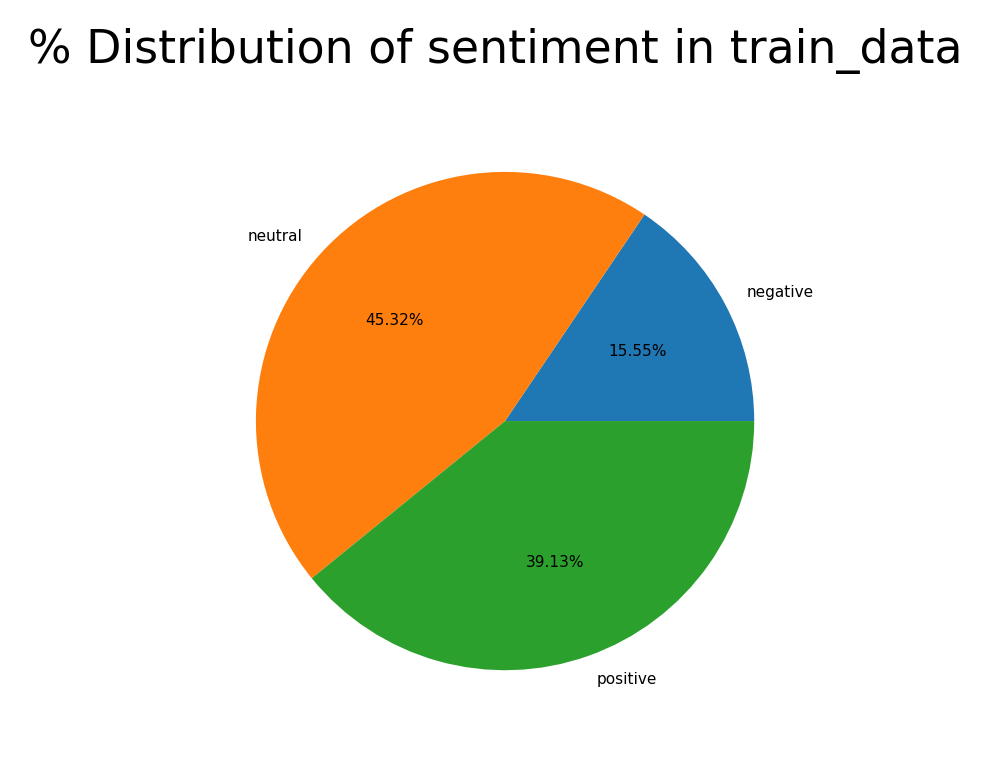

In [8]:
trainDataFrameCount = mappingVariation(trainDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(trainDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('% Distribution of sentiment in train_data')
mpl.show

<function matplotlib.pyplot.show(close=None, block=None)>

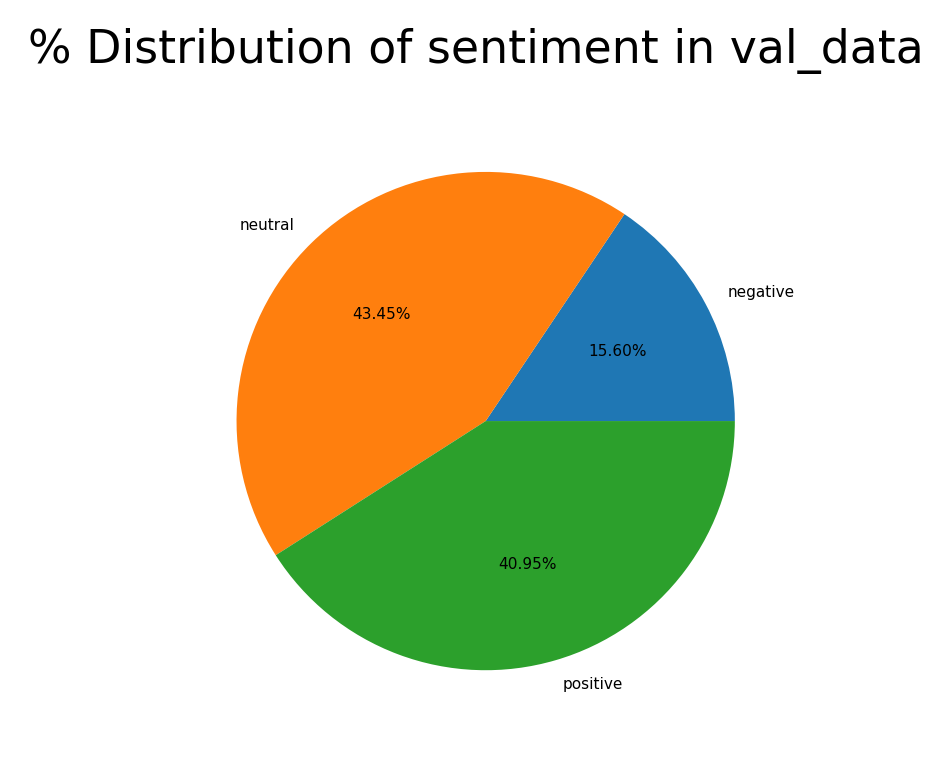

In [9]:
valDataFrameCount = mappingVariation(valDataFrame)
mpl.figure(figsize=(3,3), dpi=275)
mpl.pie(valDataFrameCount, labels=categoryNames, textprops={'fontsize':4}, autopct='%1.2f%%')
mpl.suptitle('% Distribution of sentiment in val_data')
mpl.show

# Natural Language Toolkit

 ### Testing out NLTK stopword removal

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')


for x in range(30):
    noStopWords = ""
    wordBag = word_tokenize(test_text[x])
    noStopWords = [word for word in wordBag if not word in stopwords.words()]
    print(noStopWords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gdark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['@', 'user', '@', 'user', "'", '1/2', 'naked', 'pics', "'", 'anything', '?', 'They', "'re", 'even', 'like', '.']
['OH', ':', '“', 'I', 'blue', 'penis', 'I', '”', '[', 'playing', 'Google', 'Earth', 'VR', ']']
['@', 'user', '@', 'user', 'That', "'s", 'coming', ',', 'I', 'think', 'victims', 'going', 'Medicaid', 'recipients', '.']
['I', 'think', 'I', 'may', 'finally', 'crowd', '#', 'mannequinchallenge', '#', 'grads2014', '@', 'user']
['@', 'user', 'Wow', ',', 'first', 'Hugo', 'Chavez', 'Fidel', 'Castro', '.', 'Danny', 'Glover', ',', 'Michael', 'Moore', ',', 'Oliver', 'Stone', ',', 'Sean', 'Penn', 'running', 'heroes', '.']
['Savchenko', 'Saakashvili', 'took', 'test', 'live', 'Ukraine', 'TV', '.', 'To', 'prove', 'drug-fueled', 'loonies', '?']
['How', 'many', 'days', 'opening', 'day', '?', '😩']
['Twitter', "'s", '#', 'ThankYouObama', 'Shows', 'Heartfelt', 'Gratitude', 'To', 'POTUS']
['All', 'CSG', 'Fracking', 'around', 'Australia', 'cease', 'Mining', 'Entities', 'held', 'Accountable', '!', '

 ### Testing out NLTK stemming

In [36]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 


stemmer = PorterStemmer()


for x in range(30):
    stemmed = ""
    wordBag = word_tokenize(test_text[x])
    for y in range(len(wordBag)):
        stemmed += " " + stemmer.stem(wordBag[y])
    print(stemmed)


 @ user @ user what do these ' 1/2 nake pic ' have to do with anyth ? they 're not even like that .
 OH : “ I had a blue peni while I wa thi ” [ play with googl earth VR ]
 @ user @ user that 's come , but I think the victim are go to be medicaid recipi .
 I think I may be final in with the in crowd # mannequinchalleng # grads2014 @ user
 @ user wow , first hugo chavez and now fidel castro . danni glover , michael moor , oliv stone , and sean penn are run out of hero .
 savchenko now saakashvili took drug test live on ukrain TV . To prove they are not drug-fuel looni ?
 how mani more day until open day ? 😩
 twitter 's # thankyouobama show heartfelt gratitud To potu
 all csg and frack all around australia is to ceas and mine entiti held account ! - sign the petit !
 @ user @ user @ user @ user @ user @ user take away illeg and dead peopl and trump win popular vote too .
 An interest secur vulner - albeit not for the everyday car thief
 # gilmoregirlstop4 1 . spoke2 . paris3 . emily4 . p